<a href="https://colab.research.google.com/github/farizalmustaqim/Proyek-Klasifikasi-Gambar-dengan-Tensorflow-Model/blob/main/Proyek_Klasifikasi_Gambar_dengan_Tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import tensorflow as tf
import tensorflow_datasets as tfds
import os


# Hyperparameters

In [2]:
# hyper-parameters
batch_size = 64
# 10 categories of images (CIFAR-10)
num_classes = 10
# number of training epochs
epochs = 30

# Load Dataset and Pre-processing

In [3]:
def load_data():
    """
    This function loads CIFAR-10 dataset, and preprocess it
    """
    def preprocess_image(image, label):
        # convert [0, 255] range integers to [0, 1] range floats
        image = tf.image.convert_image_dtype(image, tf.float32)
        return image, label
    # loading the CIFAR-10 dataset, splitted between train and test sets
    ds_train, info = tfds.load("cifar10", with_info=True, split="train", as_supervised=True)
    ds_test = tfds.load("cifar10", split="test", as_supervised=True)
    # repeat dataset forever, shuffle, preprocess, split by batch
    ds_train = ds_train.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    ds_test = ds_test.repeat().shuffle(1024).map(preprocess_image).batch(batch_size)
    return ds_train, ds_test, info

# Constructing Model

In [4]:
def create_model(input_shape):
    # building the model
    model = Sequential()
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same", input_shape=input_shape))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=32, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(Conv2D(filters=128, kernel_size=(3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
    # flattening the convolutions
    model.add(Flatten())
    # fully-connected layer
    model.add(Dense(1024))
    model.add(Activation("relu"))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes, activation="softmax"))
    # print the summary of the model architecture
    model.summary()
    # training the model using adam optimizer
    model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
    return model

# Training Model

In [5]:
if __name__ == "__main__":
    # load the data
    ds_train, ds_test, info = load_data()
    # constructs the model
    model = create_model(input_shape=info.features["image"].shape)
    # some nice callbacks
    logdir = os.path.join("logs", "cifar10-model-v1")
    tensorboard = TensorBoard(log_dir=logdir)
    # make sure results folder exist
    if not os.path.isdir("results"):
        os.mkdir("results")
    # train
    model.fit(ds_train, epochs=epochs, validation_data=ds_test, verbose=1,
              steps_per_epoch=info.splits["train"].num_examples // batch_size,
              validation_steps=info.splits["test"].num_examples // batch_size,
              callbacks=[tensorboard])
    # save the model to disk
    model.save("results/cifar10-model-v1.h5")

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteTGRZSP/cifar10-train.tfrecord


  0%|          | 0/50000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/cifar10/3.0.2.incompleteTGRZSP/cifar10-test.tfrecord


  0%|          | 0/10000 [00:00<?, ? examples/s]

Dataset cifar10 downloaded and prepared to /root/tensorflow_datasets/cifar10/3.0.2. Subsequent calls will reuse this data.
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 activation (Activation)     (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 32)       0         
 )                                                               
                                                                 

# Test Model

In [11]:
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np

In [7]:
# CIFAR-10 classes
categories = {
    0: "airplane",
    1: "automobile",
    2: "bird",
    3: "cat",
    4: "deer",
    5: "dog",
    6: "frog",
    7: "horse",
    8: "ship",
    9: "truck"
}

In [12]:
# load the testing set
ds_train, ds_test, info = load_data()
# load the model with final model weights
model = load_model("results/cifar10-model-v1.h5")

In [ ]:
# evaluation
loss, accuracy = model.evaluate(ds_train, ds_test)
print("Test accuracy:", accuracy*100, "%")

In [17]:
# get prediction for this image
data_sample = next(iter(ds_test))
sample_image = data_sample[0].numpy()[0]
sample_label = categories[data_sample[1].numpy()[0]]
prediction = np.argmax(model.predict(sample_image.reshape(-1, *sample_image.shape))[0])
print("Predicted label:", categories[prediction])
print("True label:", sample_label)

Predicted label: airplane
True label: airplane


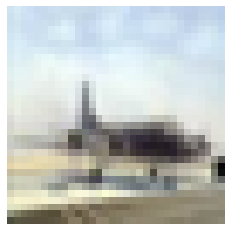

In [18]:
# show the image
plt.axis('off')
plt.imshow(sample_image)
plt.show()